In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import mapclassify

In [2]:
gdf_dis = gpd.read_file('shp/distritos.shp')
gdf_dis.head(3)

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,area_km2,Distrito_T,Dis_T,tasa,fallec,poblacion,decesos,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,3221,INEI,3223.64189,None,None,1.77,12.0,6787,12,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1740,INEI,1741.26377,None,None,1.27,6.0,4710,6,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,205,INEI,205.41110,None,None,1.35,9.0,6682,9,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."


### 1. Contenedor de mapa de colores

Para asignar la gama de colores con la que se diseñara el gráfico

256


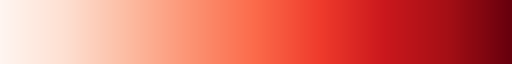

In [3]:
cmap = plt.cm.Reds
print(cmap.N)
cmap

### 2. Método de Clasificación

Se utilizar para definir el número de clases y el método de clasificación con el cual se definiran los cortes de cada INTERVALO del Mapa de Cloropetas

In [4]:
# Definir el MÉTODO de clasificación: EqualInterval, Quantiles, FisherJenks, NaturalBreaks, etc. 

# Ejemplos: Vamos a definir 5 clases para los 4 métodos de clasificación

metodo_intervalo_igual = mapclassify.EqualInterval(gdf_dis['tasa'].fillna(0), 5)
metodo_quantiles = mapclassify.Quantiles(gdf_dis['tasa'].fillna(0), 5)
metodo_fisher_jenks = mapclassify.FisherJenks(gdf_dis['tasa'].fillna(0), 5)
metodo_rupturas_naturales = mapclassify.NaturalBreaks(gdf_dis['tasa'].fillna(0), 5)

# Imprimir
print(metodo_intervalo_igual, '\n')
print(metodo_quantiles, '\n')
print(metodo_fisher_jenks, '\n')
print(metodo_rupturas_naturales)

EqualInterval         

   Interval      Count
----------------------
[ 0.00,  8.17] |  1711
( 8.17, 16.34] |   147
(16.34, 24.51] |    10
(24.51, 32.68] |     4
(32.68, 40.85] |     1 

Quantiles             

   Interval      Count
----------------------
[ 0.00,  1.14] |   375
( 1.14,  2.12] |   374
( 2.12,  3.43] |   377
( 3.43,  5.86] |   372
( 5.86, 40.85] |   375 

FisherJenks           

   Interval      Count
----------------------
[ 0.00,  2.61] |   922
( 2.61,  5.52] |   532
( 5.52,  9.79] |   333
( 9.79, 20.20] |    80
(20.20, 40.85] |     6 

NaturalBreaks         

   Interval      Count
----------------------
[ 0.00,  2.67] |   938
( 2.67,  5.62] |   530
( 5.62,  9.90] |   321
( 9.90, 20.20] |    78
(20.20, 40.85] |     6


Si queremos acceder a los cortes de cada intervalos utilizaremos el metodo **.bins** (limites)

In [14]:
print('Intervalo igual: ', metodo_intervalo_igual.bins)
print('Quantiles: ',metodo_quantiles.bins)
print('Fisher Jenks: ',metodo_fisher_jenks.bins)
print('Rupturas Naturales: ',metodo_rupturas_naturales.bins)

Intervalo igual:  [ 8.17 16.34 24.51 32.68 40.85]
Quantiles:  [ 1.144  2.118  3.43   5.856 40.85 ]
Fisher Jenks:  [ 2.61  5.52  9.79 20.2  40.85]
Rupturas Naturales:  [ 2.67  5.62  9.9  20.2  40.85]


### 3. Definir los limites de corte como una lista de números enteros

In [9]:
limites_corte_intervalo_igual = np.around(metodo_intervalo_igual.bins, 0)
limites_corte_quantiles = np.around(metodo_quantiles.bins, 0)
limites_corte_jenks = np.around(metodo_fisher_jenks.bins, 0)
limites_corte_rupturas_naturales = np.around(metodo_rupturas_naturales.bins, 0)

print('Intervalo igual: ', limites_corte_intervalo_igual)
print('Quantiles: ',limites_corte_quantiles)
print('Fisher Jenks: ',limites_corte_jenks)
print('Rupturas Naturales: ',limites_corte_rupturas_naturales)

Intervalo igual:  [ 8. 16. 25. 33. 41.]
Quantiles:  [ 1.  2.  3.  6. 41.]
Fisher Jenks:  [ 3.  6. 10. 20. 41.]
Rupturas Naturales:  [ 3.  6. 10. 20. 41.]


### 4. Indice de Mapa de colores: matplotlib.colors.BoundaryNorm

Esta función genera un índice de mapa de colores basado en intervalos discretos (números enteros). Por eso, fue necesario previamente obtener la lista de números enteros

In [10]:
norm_intervalo_igual = mpl.colors.BoundaryNorm(limites_corte_intervalo_igual, cmap.N)
norm_quantiles = mpl.colors.BoundaryNorm(limites_corte_quantiles, cmap.N)
norm_jenks = mpl.colors.BoundaryNorm(limites_corte_jenks, cmap.N)
norm_rupturas_naturales = mpl.colors.BoundaryNorm(limites_corte_rupturas_naturales, cmap.N)
norm_manual = mpl.colors.BoundaryNorm([0, 2, 5,10,15,41], cmap.N)

print(type(norm_intervalo_igual))

<class 'matplotlib.colors.BoundaryNorm'>


## Gráficar

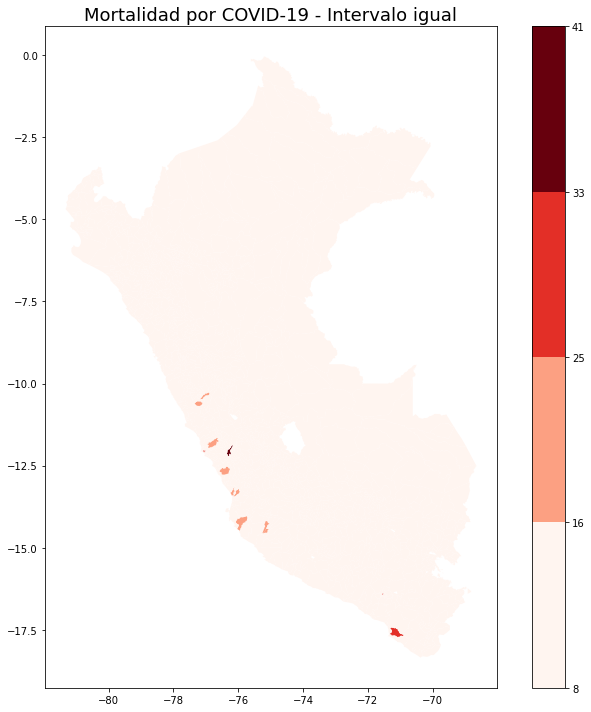

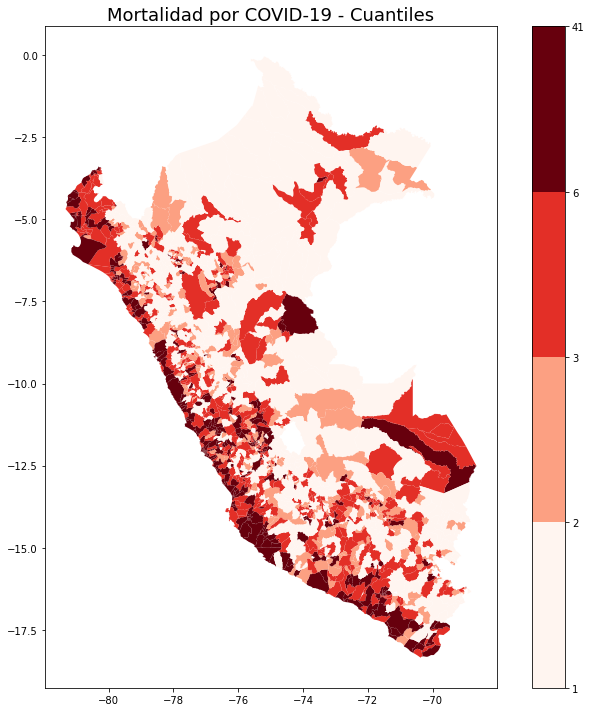

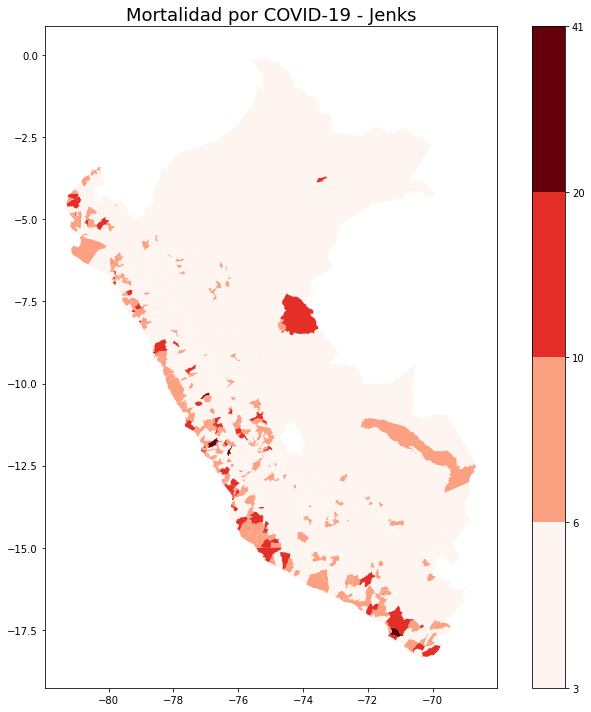

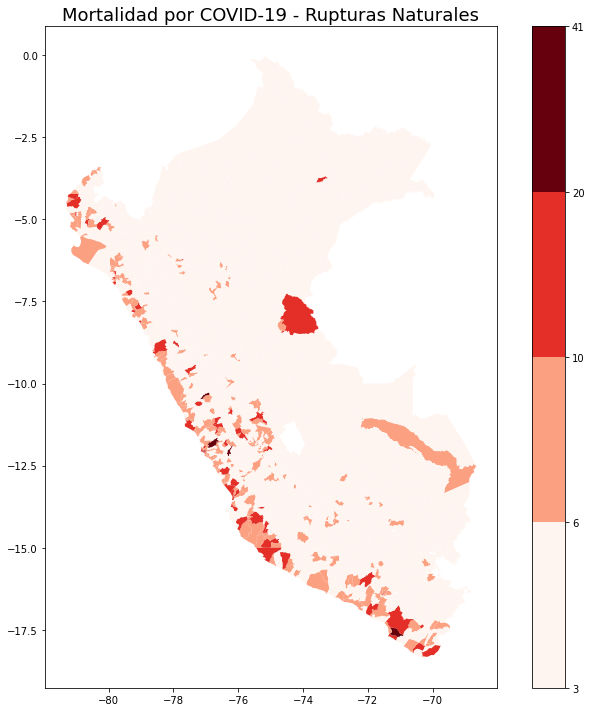

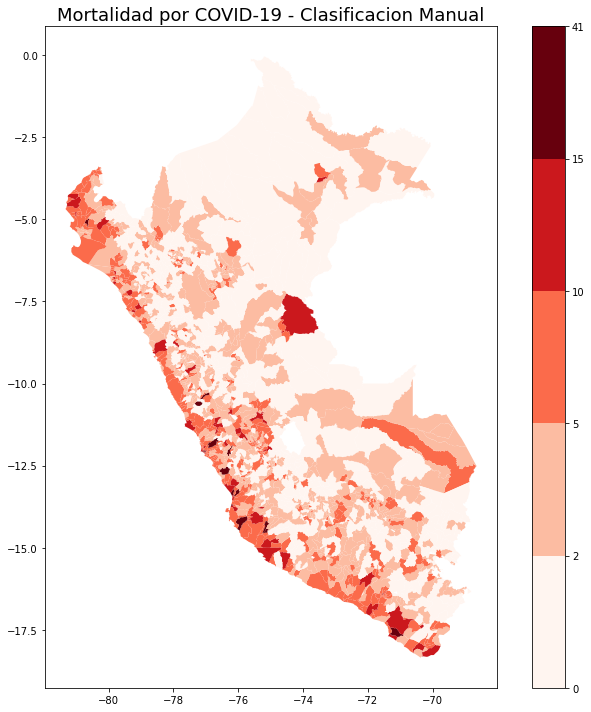

In [11]:
dict_clases = {norm_intervalo_igual:'Intervalo igual',
               norm_quantiles:'Cuantiles',
               norm_jenks:'Jenks',
               norm_rupturas_naturales:'Rupturas Naturales',
               norm_manual:'Clasificacion Manual'}

for key in dict_clases:
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))
    ax.set_title(f'Mortalidad por COVID-19 - {dict_clases[key]}', fontsize = 18)
    gdf_dis.plot(column='tasa', cmap= cmap, norm = key, ax=ax, zorder=10, legend=True)
    plt.tight_layout()
    plt.show()

**NOTA**: Podemos observar que no toma el 0 como limite de INICIO, por lo tanto es posible optimizar la visualización de la siguiente manera y reducir código.

Para los siguientes gráfico solo vamos a considerar el punto 2 (el método de clasificación con el número de clases).

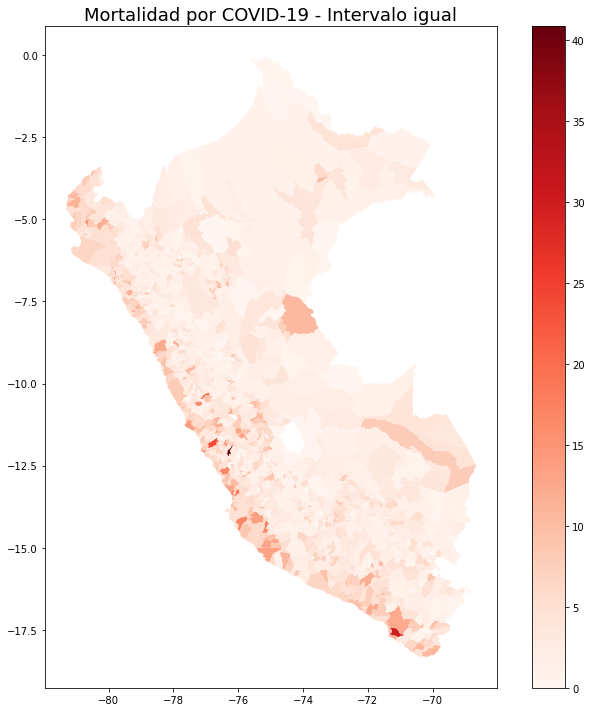

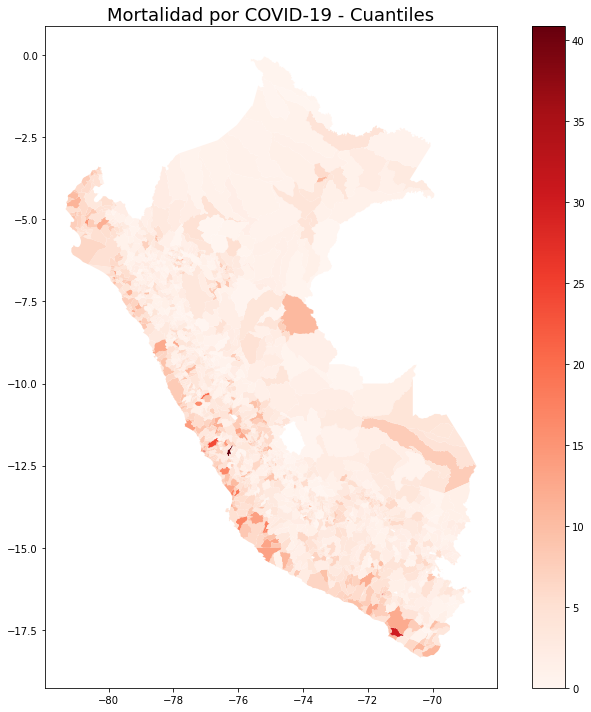

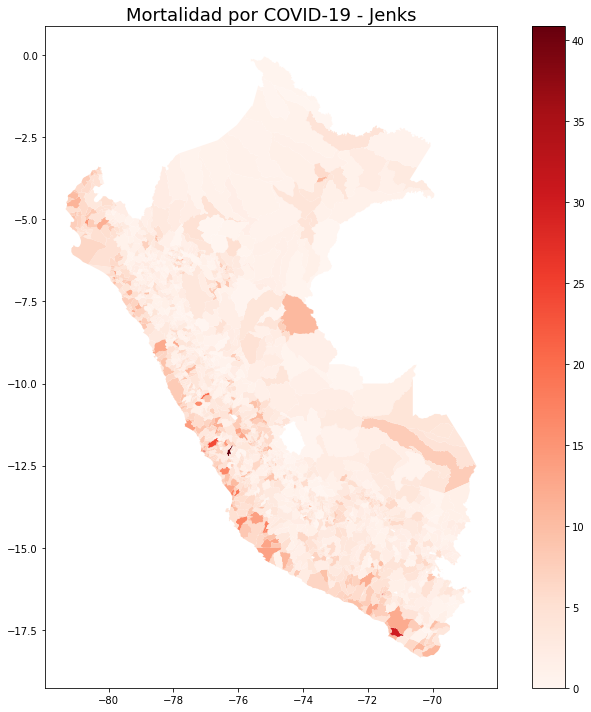

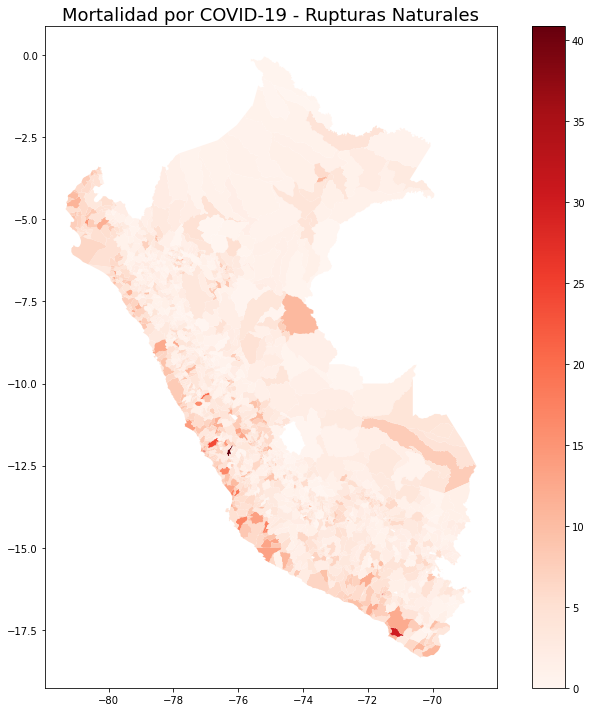

In [23]:
dict_metodos = {metodo_intervalo_igual:'Intervalo igual',
               metodo_quantiles:'Cuantiles',
               metodo_fisher_jenks:'Jenks',
               metodo_rupturas_naturales:'Rupturas Naturales',
               }

for key in dict_metodos:
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))
    ax.set_title(f'Mortalidad por COVID-19 - {dict_metodos[key]}', fontsize = 18)
    gdf_dis.assign(cl=key.yb).plot(column='tasa', cmap= cmap, ax=ax, zorder=10, legend=True)
    plt.tight_layout()
    plt.show()